Lab 01 Write a MATLAB or program using perception net for AND function with bipolar inputs and targets. The convergence curves and the decision boundary lines are also shown.

[-0.29055152 -0.7663933  -0.55463402]
Final Weights: [ 0.30944848  0.2336067  -0.35463402]
Training completed in 4 epochs


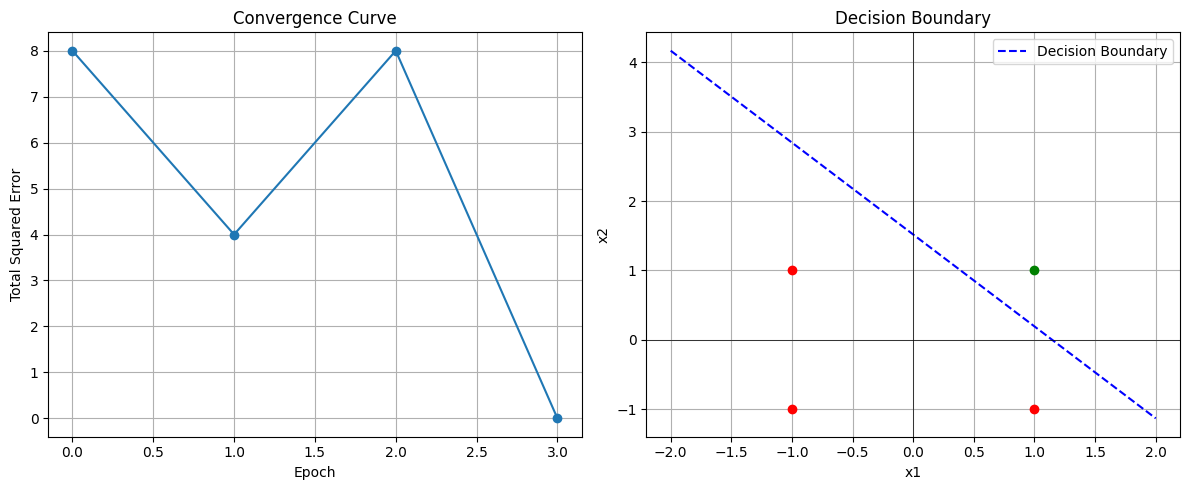

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Bipolar inputs and targets for AND function
X = np.array([
    [-1, -1],
    [-1,  1],
    [ 1, -1],
    [ 1,  1]
])

# Bipolar targets: AND operation
T = np.array([-1, -1, -1, 1])

# Add bias input
X_bias = np.hstack((X, np.ones((X.shape[0], 1))))

# Initialize weights
weights = np.random.uniform(-1, 1, X_bias.shape[1])
print(f"{weights}")

# Hyperparameters
learning_rate = 0.1
epochs = 50
errors = []

# Activation function: Bipolar step function
def activation(v):
    return 1 if v >= 0 else -1

# Training the Perceptron
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X_bias)):
        net_input = np.dot(weights, X_bias[i])
        output = activation(net_input)
        error = T[i] - output
        weights += learning_rate * error * X_bias[i]
        total_error += error ** 2
    errors.append(total_error)

    # Stop if fully trained (no error)
    if total_error == 0:
        break

print(f"Final Weights: {weights}")
print(f"Training completed in {epoch+1} epochs")

# Plotting the error convergence
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(errors, marker='o')
plt.title("Convergence Curve")
plt.xlabel("Epoch")
plt.ylabel("Total Squared Error")
plt.grid(True)

# Plotting decision boundary
plt.subplot(1, 2, 2)
for i in range(len(X)):
    if T[i] == 1:
        plt.plot(X[i][0], X[i][1], 'go')  # green for class 1
    else:
        plt.plot(X[i][0], X[i][1], 'ro')  # red for class -1

# Decision boundary: w1*x1 + w2*x2 + b = 0
# x2 = -(w1*x1 + b) / w2
x_vals = np.linspace(-2, 2, 100)
if weights[1] != 0:
    y_vals = -(weights[0] * x_vals + weights[2]) / weights[1]
    plt.plot(x_vals, y_vals, 'b--', label="Decision Boundary")
else:
    plt.axvline(-weights[2]/weights[0], color='b', linestyle='--', label="Decision Boundary")

plt.title("Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
# Test data (bipolar format)
test_samples = np.array([
    [-1, -1],
    [-1,  1],
    [ 1, -1],
    [ 1,  1],
    [ 0,  0],      # You can even try intermediate points
    [-0.1, 0.5],
    [-0.5, 1],
])

print("\nTesting on new data points:")
for sample in test_samples:
    sample_bias = np.append(sample, 1)  # Add bias
    net_input = np.dot(weights, sample_bias)
    prediction = activation(net_input)
    print(f"Input: {sample} → Predicted Output: {prediction}")



Testing on new data points:
Input: [-1. -1.] → Predicted Output: -1
Input: [-1.  1.] → Predicted Output: -1
Input: [ 1. -1.] → Predicted Output: -1
Input: [1. 1.] → Predicted Output: 1
Input: [0. 0.] → Predicted Output: -1
Input: [-0.1  0.5] → Predicted Output: -1
Input: [-0.5  1. ] → Predicted Output: -1


Lab02: Write a MATLAB or Python program to recognize the numbers 1 to 4 from the matrix form of number. The net has to be trained to recognize all the numbers, and when the test data is given, the network has to recognize the particular number.

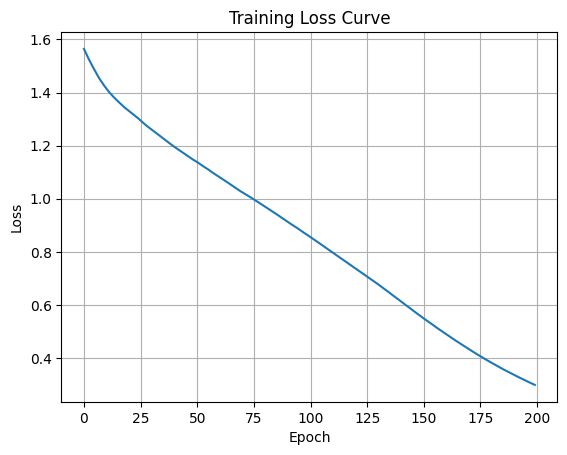

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Digit patterns (5x3 matrix for each digit: 1 to 4)
# Each digit is flattened into a 1D array (15 elements)
digits = {
    '1': [
        [0, 1, 0],
        [1, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 1, 1]
    ],
    '2': [
        [1, 1, 1],
        [0, 0, 1],
        [1, 1, 1],
        [1, 0, 0],
        [1, 1, 1]
    ],
    '3': [
        [1, 1, 1],
        [0, 0, 1],
        [0, 1, 1],
        [0, 0, 1],
        [1, 1, 1]
    ],
    '4': [
        [1, 0, 1],
        [1, 0, 1],
        [1, 1, 1],
        [0, 0, 1],
        [0, 0, 1]
    ]
}

# Prepare training data
X = []
y = []
for label, matrix in digits.items():
    X.append(np.array(matrix).flatten())
    y.append(int(label) - 1)  # Labels: 0 to 3

X = np.array(X)
y = tf.keras.utils.to_categorical(y, num_classes=4)  # One-hot encoding

# Create the model
model = Sequential([
    Dense(10, input_dim=15, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')  # Output layer for 4 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=200, verbose=0)

# Plot the loss curve
plt.plot(history.history['loss'])
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Function to predict a digit
def predict_digit(matrix):
    matrix = np.array(matrix).flatten().reshape(1, -1)
    prediction = model.predict(matrix, verbose=0)
    predicted_class = np.argmax(prediction)
    print(f"Predicted digit: {predicted_class + 1}")




In [ ]:
# Test with a noisy or exact version of digit '3'
test_digit = [
    [1, 1, 0],
    [0, 1, 0],
    [1, 1, 0],
    [1, 1, 0],
    [1, 1, 1]
]

predict_digit(test_digit)

Predicted digit: 1


Lab 03 Write a Python program to show Back Propagation Network for XOR function with Binary Input and Output.

In [ ]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR input and output
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([[0], [1], [1], [0]])
# Seed for reproducibility
np.random.seed(42)
# Define network architecture
input_layer_neurons = 2
hidden_layer_neurons = 2
output_neurons = 1
# Initialize weights randomly
weights_input_hidden = 2 * np.random.random((input_layer_neurons, hidden_layer_neurons)) - 1
weights_hidden_output = 2 * np.random.random((hidden_layer_neurons, output_neurons)) - 1
# Training parameters
learning_rate = 0.5
epochs = 30000
# Training loop
for epoch in range(epochs):
    input_layer = X
    hidden_input = np.dot(input_layer, weights_input_hidden)
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output)
    predicted_output = sigmoid(final_input)
    error = y - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_output)
    weights_hidden_output += hidden_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += input_layer.T.dot(d_hidden_layer) * learning_rate
# Print final training info only
print("\nFinal Weights After Training:")
print("Weights from Input to Hidden Layer:\n", weights_input_hidden)
print("\nWeights from Hidden to Output Layer:\n", weights_hidden_output)
print("\nFinal Mean Absolute Error:", np.mean(np.abs(error)))
print("\nPredicted Output on Training Data:")
for i in range(len(X)):
    output_val = predicted_output[i][0]
    output_class = 1 if output_val >= 0.5 else 0
    print(f"Input: {X[i]} => Predicted: {np.round(output_val, 2)} => Class: {output_class}")


Final Weights After Training:
Weights from Input to Hidden Layer:
 [[0.93523723 7.91071158]
 [0.93524066 7.91301594]]

Weights from Hidden to Output Layer:
 [[-36.24437531]
 [ 28.8774392 ]]

Final Mean Absolute Error: 0.05223765761269856

Predicted Output on Training Data:
Input: [0 0] => Predicted: 0.02 => Class: 0
Input: [0 1] => Predicted: 0.94 => Class: 1
Input: [1 0] => Predicted: 0.94 => Class: 1
Input: [1 1] => Predicted: 0.07 => Class: 0


In [ ]:
# Test the model with new inputs
def test_model(x1, x2):
    input_data = np.array([[x1, x2]])
    hidden_input = np.dot(input_data, weights_input_hidden)
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output)
    output_val = sigmoid(final_input)

    output_class = 1 if output_val >= 0.5 else 0
    print(f"Test Input: [{x1}, {x2}] => Predicted Output: {np.round(output_val[0][0], 2)} => Class: {output_class}")

#input_values
test_model(0, 0)
test_model(0, 1)
test_model(1, 0)
test_model(1, 1)


Test Input: [0, 0] => Predicted Output: 0.02 => Class: 0
Test Input: [0, 1] => Predicted Output: 0.94 => Class: 1
Test Input: [1, 0] => Predicted Output: 0.94 => Class: 1
Test Input: [1, 1] => Predicted Output: 0.07 => Class: 0


Lab 04 Write a python program to detect mail spam using Error correction learning

In [6]:
import numpy as np

# Binary features: [has_buy, has_free, has_click]
emails = np.array([
    [1, 0, 1],  # "buy now click" → spam
    [0, 1, 0],  # "free trial" → spam
    [1, 1, 1],  # "buy free click" → spam
    [0, 0, 0],  # "hello friend" → not spam
    [0, 0, 1],  # "click here" → spam
    [1, 0, 0],  # "buy now" → spam
    [0, 1, 1],  # "free click" → spam
    [0, 0, 0],  # "meeting schedule" → not spam
])

# Labels: 1 = spam, 0 = not spam
labels = np.array([1, 1, 1, 0, 1, 1, 1, 0])

def activation(x):
    return 1 if x >= 0 else 0

def train(X, y, learning_rate=0.1, epochs=10):
    weights = np.zeros(X.shape[1])
    bias = 0

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}")
        for i in range(len(X)):
            input_vector = X[i]
            target = y[i]
            output = activation(np.dot(input_vector, weights) + bias)
            error = target - output

            # Error correction learning
            weights += learning_rate * error * input_vector
            bias += learning_rate * error

            print(f"Input: {input_vector}, Target: {target}, Output: {output}, Error: {error}")
            print(f"Weights: {weights}, Bias: {bias}")
        print()
    return weights, bias

def predict(X, weights, bias):
    return [activation(np.dot(x, weights) + bias) for x in X]

# Train the model
weights, bias = train(emails, labels)


Epoch 1
Input: [1 0 1], Target: 1, Output: 1, Error: 0
Weights: [0. 0. 0.], Bias: 0.0
Input: [0 1 0], Target: 1, Output: 1, Error: 0
Weights: [0. 0. 0.], Bias: 0.0
Input: [1 1 1], Target: 1, Output: 1, Error: 0
Weights: [0. 0. 0.], Bias: 0.0
Input: [0 0 0], Target: 0, Output: 1, Error: -1
Weights: [0. 0. 0.], Bias: -0.1
Input: [0 0 1], Target: 1, Output: 0, Error: 1
Weights: [0.  0.  0.1], Bias: 0.0
Input: [1 0 0], Target: 1, Output: 1, Error: 0
Weights: [0.  0.  0.1], Bias: 0.0
Input: [0 1 1], Target: 1, Output: 1, Error: 0
Weights: [0.  0.  0.1], Bias: 0.0
Input: [0 0 0], Target: 0, Output: 1, Error: -1
Weights: [0.  0.  0.1], Bias: -0.1

Epoch 2
Input: [1 0 1], Target: 1, Output: 1, Error: 0
Weights: [0.  0.  0.1], Bias: -0.1
Input: [0 1 0], Target: 1, Output: 0, Error: 1
Weights: [0.  0.1 0.1], Bias: 0.0
Input: [1 1 1], Target: 1, Output: 1, Error: 0
Weights: [0.  0.1 0.1], Bias: 0.0
Input: [0 0 0], Target: 0, Output: 1, Error: -1
Weights: [0.  0.1 0.1], Bias: -0.1
Input: [0 0 1], 

In [5]:
# Test with new emails
test_emails = np.array([
    [0, 0, 0],  # "buy free" → spam
    [0, 0, 0],  # "team update" → not spam
    [0, 1, 1],  # "free click" → spam
])

print("🔍 Predictions:")
for email in test_emails:
    result = activation(np.dot(email, weights) + bias)
    print(f"Email features: {email}, Prediction: {'Spam' if result == 1 else 'Not Spam'}")


🔍 Predictions:
Email features: [0 0 0], Prediction: Not Spam
Email features: [0 0 0], Prediction: Not Spam
Email features: [0 1 1], Prediction: Spam


Lab 05:

Epoch 10 completed.


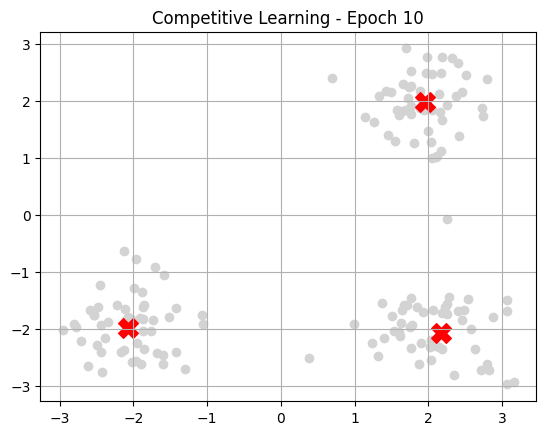

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic 2D input data
np.random.seed(42)
data = np.concatenate([
    np.random.randn(50, 2) * 0.5 + [2, 2],
    np.random.randn(50, 2) * 0.5 + [-2, -2],
    np.random.randn(50, 2) * 0.5 + [2, -2]
])

# Parameters
num_neurons = 3
learning_rate = 0.1
epochs = 10

# Initialize weights randomly
weights = np.random.randn(num_neurons, 2)

def euclidean_distance(x, w):
    return np.linalg.norm(x - w)

# Training with plotting at each epoch
for epoch in range(epochs):
    for x in data:
        distances = np.array([euclidean_distance(x, w) for w in weights])
        winner_index = np.argmin(distances)
        weights[winner_index] += learning_rate * (x - weights[winner_index])



print(f"Epoch {epoch+1} completed.")

# Plot after each epoch
plt.scatter(data[:, 0], data[:, 1], c='lightgray', label="Data")
plt.scatter(weights[:, 0], weights[:, 1], c='red', marker='X', s=200)
plt.title(f"Competitive Learning - Epoch {epoch+1}")
plt.grid(True)
plt.pause(0.5)  # Pause to view plot
plt.show()


Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Epoch 4 completed.
Epoch 5 completed.
Epoch 6 completed.
Epoch 7 completed.
Epoch 8 completed.
Epoch 9 completed.
Epoch 10 completed.
Epoch 11 completed.
Epoch 12 completed.
Epoch 13 completed.
Epoch 14 completed.
Epoch 15 completed.
Epoch 16 completed.
Epoch 17 completed.
Epoch 18 completed.
Epoch 19 completed.
Epoch 20 completed.


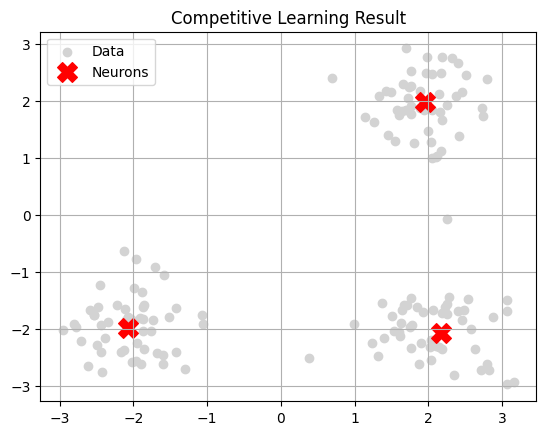

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic 2D input data
np.random.seed(42)
data = np.concatenate([
    np.random.randn(50, 2) * 0.5 + [2, 2],
    np.random.randn(50, 2) * 0.5 + [-2, -2],
    np.random.randn(50, 2) * 0.5 + [2, -2]
])

# Parameters
num_neurons = 3
learning_rate = 0.1
epochs = 20

# Initialize weights randomly (neurons)
weights = np.random.randn(num_neurons, 2)

def euclidean_distance(x, w):
    return np.linalg.norm(x - w)

# Training using competitive learning
for epoch in range(epochs):
    for x in data:
        # Compute distances
        distances = np.array([euclidean_distance(x, w) for w in weights])
        winner_index = np.argmin(distances)

        # Update only the winner neuron's weights
        weights[winner_index] += learning_rate * (x - weights[winner_index])

    print(f"Epoch {epoch+1} completed.")

# Plot final clusters
plt.scatter(data[:, 0], data[:, 1], c='lightgray', label="Data")
plt.scatter(weights[:, 0], weights[:, 1], c='red', label="Neurons", marker='X', s=200)
plt.title("Competitive Learning Result")
plt.legend()
plt.grid(True)
plt.show()


Lab 06 Write a python program to implement OR function using perceptron learning.

In [41]:
import numpy as np

# Step activation function
def step(x):
    return 1 if x >= 0 else 0

# OR Gate Training Data
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
D = np.array([0, 1, 1, 1])  # Desired output (OR logic)

# Initialize parameters
weights = np.zeros(2)  # w1 and w2
bias = 0.0
learning_rate = 0.1
epochs = 10

# Perceptron Learning using given algorithm
for epoch in range(epochs):
    for i in range(len(X)):
        x = X[i]
        d = D[i]

        # Compute output
        linear_output = np.dot(weights, x) + bias
        y = step(linear_output)

        # Compute error
        e = d - y

        # Update if error ≠ 0
        if e != 0:
            weights += learning_rate * e * x
            bias += learning_rate * e
print(f"\nEpoch {epoch+1}")
print(f"Input: {x}, Target: {d}, Predicted: {y}, Error: {e}, Weights: {weights}, Bias: {bias}")

# Final results
print("\n--- Final Evaluation ---")
for x in X:
    y = step(np.dot(weights, x) + bias)
    print(f"Input: {x} => Output: {y}")



Epoch 10
Input: [1 1], Target: 1, Predicted: 1, Error: 0, Weights: [0.1 0.1], Bias: -0.1

--- Final Evaluation ---
Input: [0 0] => Output: 0
Input: [0 1] => Output: 1
Input: [1 0] => Output: 1
Input: [1 1] => Output: 1


In [46]:
# Testing function for OR Perceptron
def test_perceptron(test_inputs, weights, bias):
    print("\n--- Testing the OR Perceptron ---")
    for x in test_inputs:
        linear_output = np.dot(weights, x) + bias
        y = step(linear_output)
        print(f"Input: {x} => Output: {y}")

# Test data: you can add more custom test cases
test_data = np.array([
    [0, 1],
    [0, 0],
    [1, 0],
    [1, 1],
])

# Run the test
test_perceptron(test_data, weights, bias)



--- Testing the OR Perceptron ---
Input: [0 1] => Output: 1
Input: [0 0] => Output: 0
Input: [1 0] => Output: 1
Input: [1 1] => Output: 1
